In [54]:
import numpy as np
import pandas
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import networkx as nx

Pour des raisons de praticité nous avons modifié le csv que Laetitia nous avait envoyé. 

In [115]:
bio_cont_2_ini = pandas.read_csv('MAM4-exemples/bio_cont_2.csv')
print(bio_cont_2_ini.shape)

(301, 81)


In [116]:
bio_cont_2_ini.head(5)

,valid,K_atp,K_atp:glyc1,K_atp:nopla,K_atp:noprola,K_atp:phoxa,K_atp:glyc1:phoxa,K_atp:glyc1:glyc2,K_atp:nopla:noprola,K_atp:nopla:phoxa,...,K_nadh:gpdh:krebsn:noaas:phoxn,K_nadh:fermn:krebsn:noaas:phoxn,K_nadh:fermn:gpdh:krebsn:noaas:phoxn,K_krebs,K_krebs:box,K_krebs:pnh,K_krebs:pnh:sat,K_phox,K_phox:pc,Error explanation
0,NaN,0.0,0.0,0.0,0.0,1.1,1.1,1.1,0.0,1.2,...,1.1,1.1,1.1,0.0,0.0,1.1,2.2,0.0,1.1,NaN
1,OK,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,NaN
2,OK,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,NaN
3,OK,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,NaN
4,OK,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,NaN


On enlève la première ligne qui est juste une indication sur les valeurs prises par chaque colonne.

In [131]:
ligne_1 = bio_cont_2_ini.iloc[0]
l1 = ligne_1.to_numpy()
bio_cont_2 = bio_cont_2_ini.drop([0],axis=0)
np_2 = bio_cont_2.to_numpy()

In [118]:
def trouve_premier_ko(base):
    """base : tableau numpy
        retourne : la première ligne à laquelle est présente un KO"""
    n,m = np.shape(base)
    i = 0
    b = True
    indice = -1
    while(i < n and b):
        if(base[i][0] == "KO"):
            ind = i
            b = False
        i = i+1
    return ind

In [119]:
a = trouve_premier_ko(np_2)
print(a)

120


Donc pour ce fichier à partir de la ligne 120 il y a les KO
On va donc couper le fichier en 2 bases pour d'abord traiter uniquement que les cas OK

In [87]:
#base de ok
OK_base = bio_cont_2[:a]
#base de ko
KO_base = bio_cont_2[a:]

In [88]:
OK_base = OK_base.drop(['Error explanation'],axis=1)
KO_base = KO_base.drop(['Error explanation'],axis=1)
OK_base = OK_base.drop(['valid'],axis=1)
KO_base = KO_base.drop(['valid'],axis=1)

In [89]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [90]:
Z = linkage(OK_base,method='average',metric='jaccard')

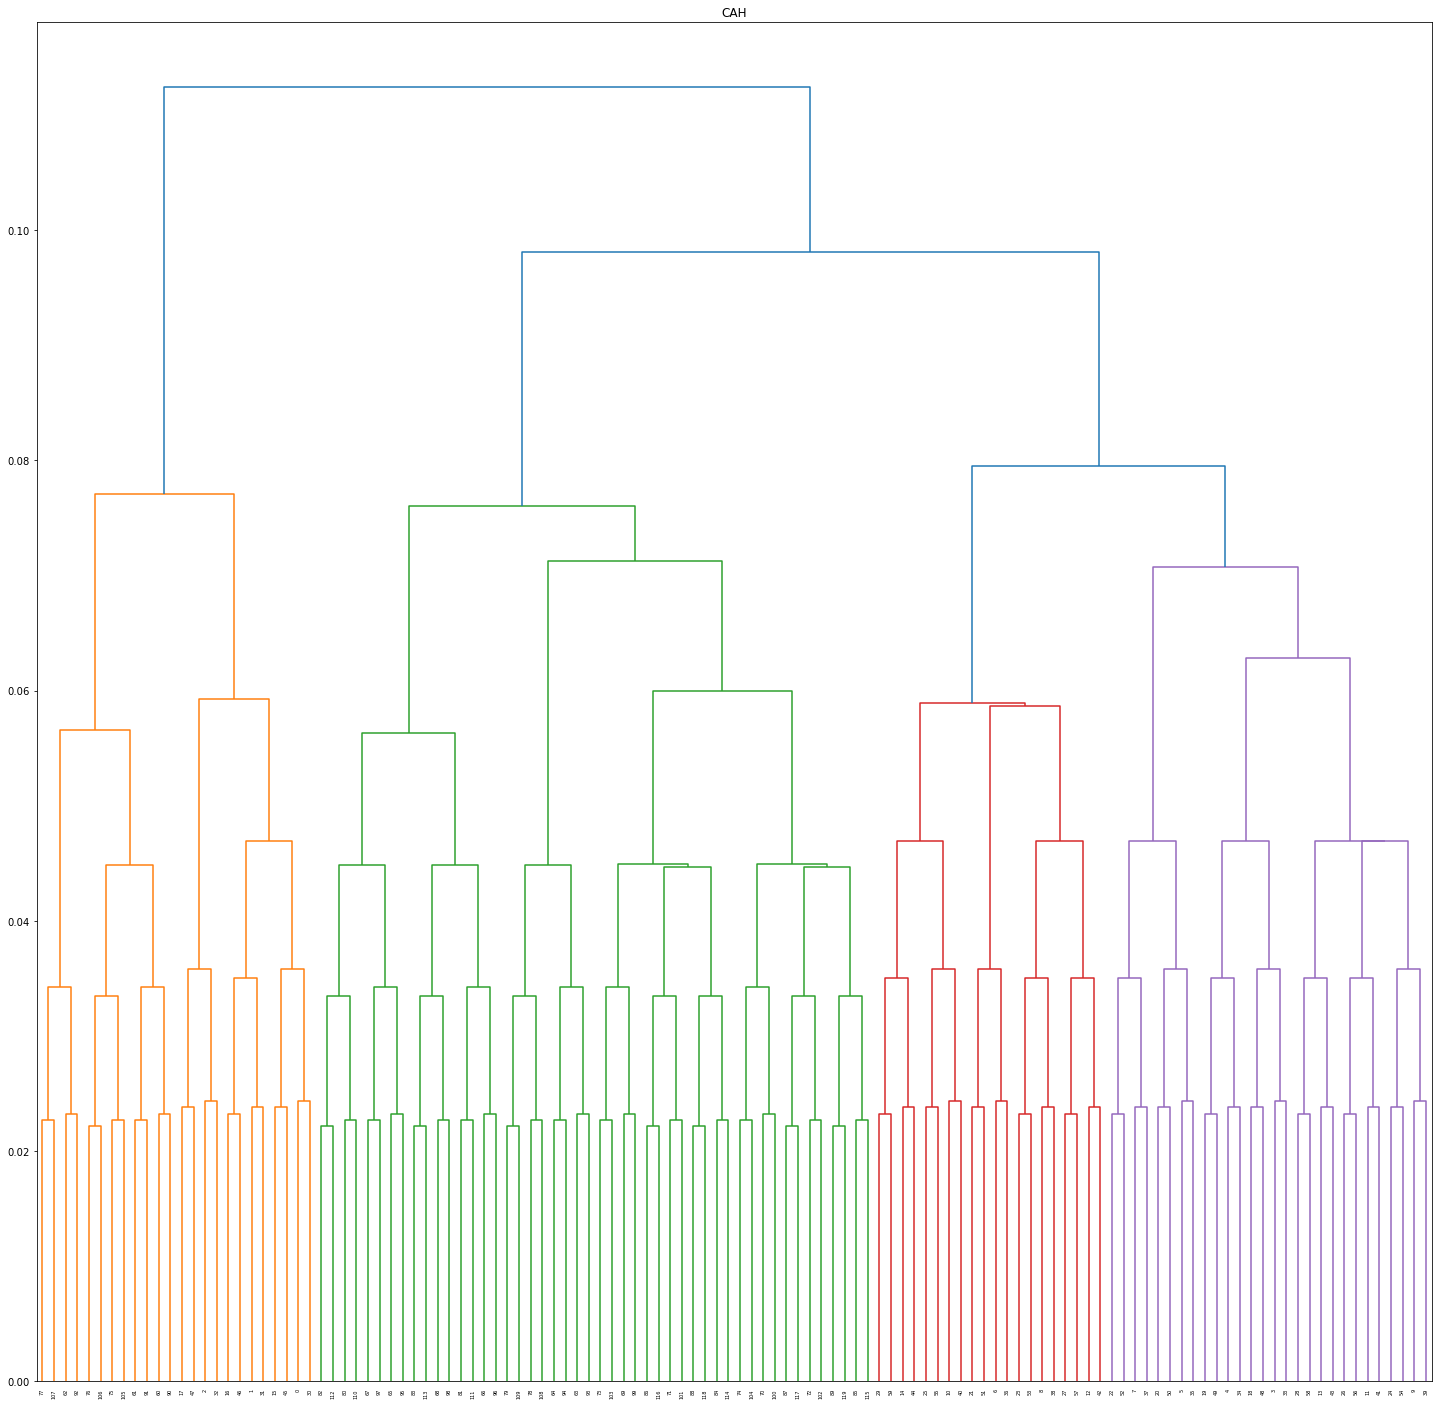

In [91]:
fig = plt.figure(1, figsize=(25, 25))
plt.title("CAH")
dendrogram(Z)
plt.axhline(y=0.12)
plt.show()

D'après ce que j'ai compris pour l'instant on trouve le nombre de cluster optimal est trouveé en fonction de la distance qu'on souhaite entre 1 point et son plus proche voisin, dans notre cas si on prend la distance maximale = 0.4
On trace une droite verticale au niveau de 0.4 et on compte le nombre de branches qu'on intercepte.
Ici on trouve 4 clusters pour une distance maximale de 0.4
On le visualise dans l'autre sens pour mieux voir.

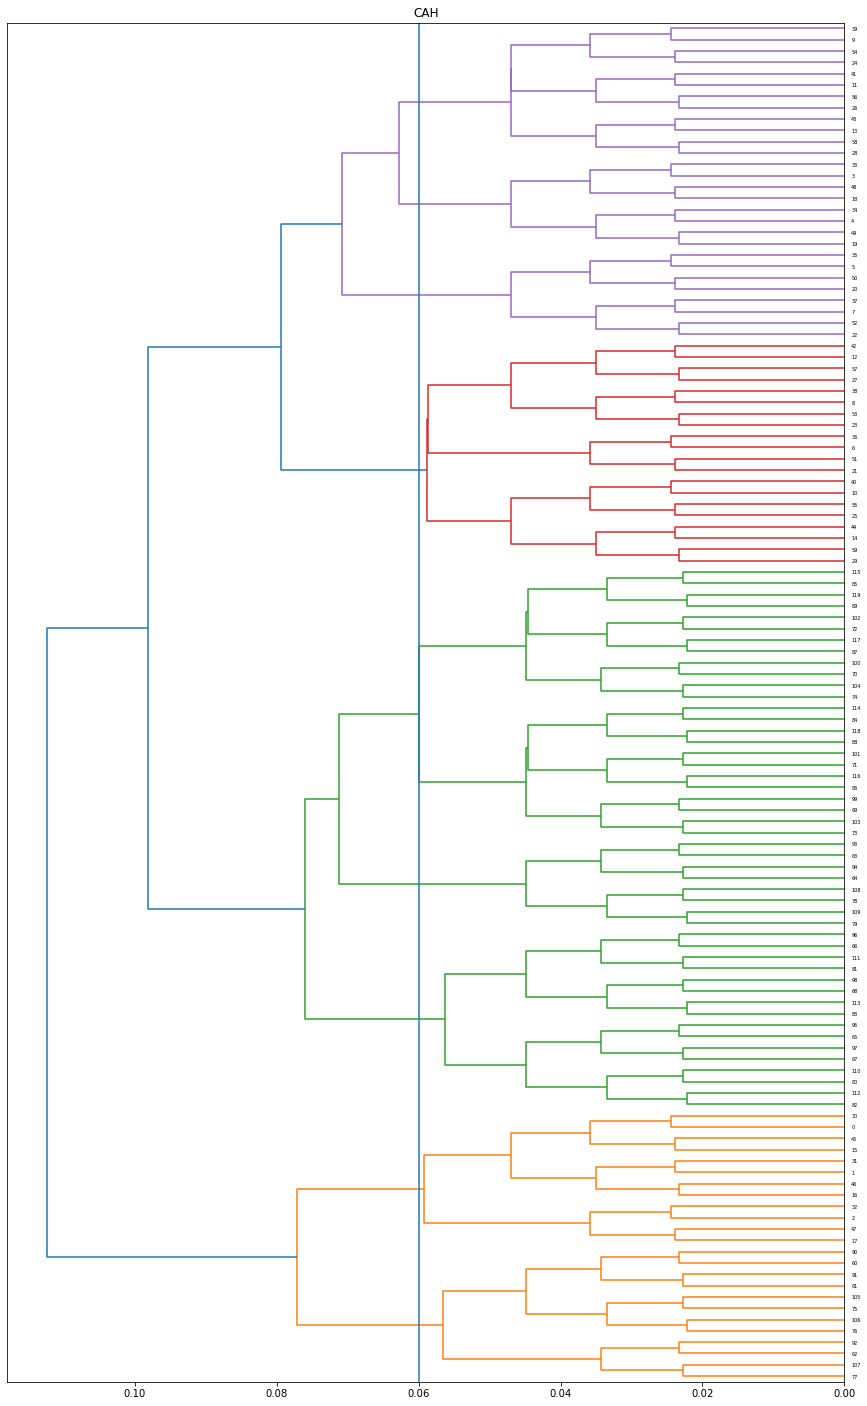

In [94]:
fig = plt.figure(1, figsize=(15, 25))
plt.title("CAH")
dendrogram(Z,orientation='left')
plt.axvline(x=0.06)
plt.show()

Pour l'instant on ne sait pas trop combien il faut de cluster.

In [314]:
k = 4

In [315]:
from scipy.cluster.hierarchy import fcluster, cophenet
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [316]:
Hc = AgglomerativeClustering(n_clusters=k, affinity='jaccard', linkage='average')

In [317]:
Hc.fit(OK_base)

AgglomerativeClustering(affinity='jaccard', linkage='average', n_clusters=4)

In [318]:
l = Hc.labels_

In [319]:
def affiche_cluster(label, nb_cluster):
    for i in range(nb_cluster):
        print(np.where(label==i))
        
def retourne_cluster(label, nb_cluster):
    tableau = []
    for i in range(nb_cluster):
        tableau.append(np.where(label==i))
    return tableau

In [320]:
affiche_cluster(l,k)
clusters = retourne_cluster(l,k)

(array([  0,   1,   2,  15,  16,  17,  30,  31,  32,  45,  46,  47,  60,
        61,  62,  75,  76,  77,  90,  91,  92, 105, 106, 107]),)
(array([ 3,  4,  5,  7,  9, 11, 13, 18, 19, 20, 22, 24, 26, 28, 33, 34, 35,
       37, 39, 41, 43, 48, 49, 50, 52, 54, 56, 58]),)
(array([ 63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119]),)
(array([ 6,  8, 10, 12, 14, 21, 23, 25, 27, 29, 36, 38, 40, 42, 44, 51, 53,
       55, 57, 59]),)


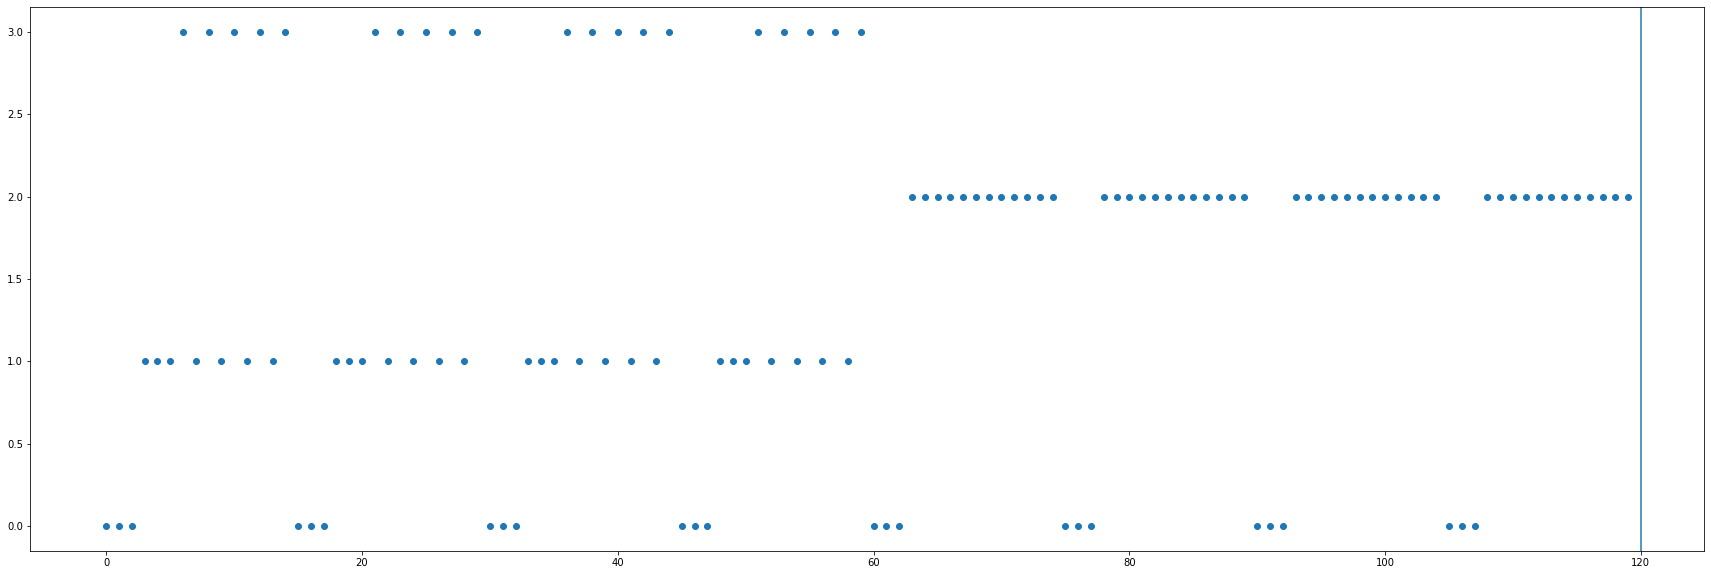

In [321]:
fig = plt.figure(2, figsize = (30,10))
plt.scatter(range(120),l)
plt.axvline(x=120)

On va faire une fonction qui permet de donner les colonnes qui ne sont pas partagées par tous les éléments d'un cluster.
Et voir si les colonnes qui ne sont pas en commun prennent toutes les valeurs possibles.

In [327]:
def recup_col_importante(vect_val):
    n = np.size(vect_val)
    val_import = []
    for i in range(n):
        a =vect_val[i]
        entier = int(a)
        decim = int(round(a%1,2)*10)
        if(entier != decim):
            val_import.append(i)
    return val_import

def colonne_diff(l1, cluster,bd):
    """l1 est la premiere ligne de la base de donnée
        cluster est un tableau qui contient tous les indices des modèles de ce cluster"""
    #on recupere toutes les colonnes qui sont susceptibles de prendre des val différentes.
    vect = recup_col_importante(l1)
    
    #on veut garder seulement les lignes utiles
    tableau = bd.to_numpy()
    tableau = tableau[cluster,:]
    
    #on redimensionne notre table correctement
    o,p,q = np.shape(tableau)
    tableau = np.reshape(tableau,(p,q))
    o1,p1 = np.shape(cluster)
    cluster = np.reshape(cluster,p1)
    #l1 = l1[vect]
    #pour chaque colonne on va regarder si toutes les valeurs sont prises ou pas.
    indice = []
    for i in vect:
        val_min = int(l1[i])
        val_max = int(round(l1[i]%1,2)*10)
        tab_min = np.min(tableau[:,i])
        tab_max = np.max(tableau[:,i])
        if(val_min!=tab_min or val_max != tab_max):
            indice.append(i)
    return indice

In [328]:
l1[0] = 0.0
l1[-1] = 0.0

Essai pour un cluster

In [329]:
i = colonne_diff(l1,clusters[0],bio_cont_2 )
print(i)

[9, 10, 13, 16, 33, 34]


On va faire une fonction qui pour chaque cluster calcule les colonnes charnieres.

In [330]:
def colonne_diff_tot(l1,clusters,bd):
    recap = []
    n,m = np.shape(clusters)
    for i in range(n):
        recap.append(colonne_diff(l1, clusters[i],bd))
    return recap

In [331]:
print(colonne_diff_tot(l1,clusters, bio_cont_2))

[[9, 10, 13, 16, 33, 34], [9, 21, 33, 34, 35, 36], [21, 33, 34, 36, 37], [9, 16, 21, 33, 34, 35, 36]]
